In [154]:
import pandas as pd
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



In [155]:
train = pd.read_csv("train.csv")



# data exploration

+ imbalanced towards the negative (57%) - what to do...
+ for starters, only the text is relevant, location is not 
+ length of the tweet is not a good feature
+ not that many duplicates (110 total in our training set) improvement manually clean it up 



In [156]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [157]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [158]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [159]:
#char length >140 due to emojis
train["text"].str.len().describe()


count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text, dtype: float64

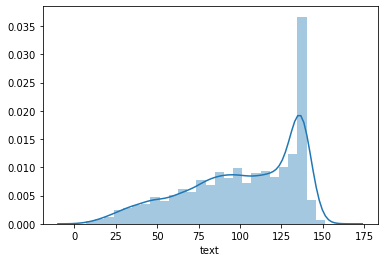

In [160]:
sns.distplot(train["text"].str.len())

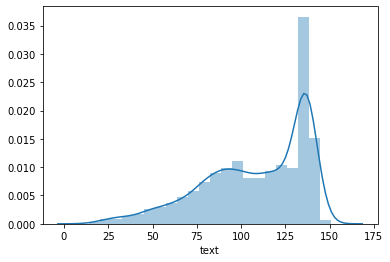

In [161]:
sns.distplot(train[train.target==1].text.str.len())

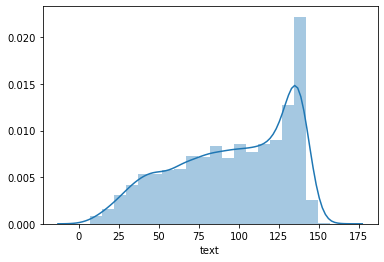

In [162]:
sns.distplot(train[train.target==0].text.str.len())


In [163]:
train[train.duplicated(["text"], keep=False)]

,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [164]:
train = train.drop_duplicates("text")


In [165]:
count_vectorizer = CountVectorizer()

## let's get counts for the first 5 tweets in the data




In [166]:
train_split, test_split = train_test_split(train, test_size=0.3, shuffle=False)

In [167]:

train_vectors = count_vectorizer.fit_transform(train_split["text"])
test_vectors = count_vectorizer.transform(test_split["text"])


In [168]:
clf = linear_model.LogisticRegression(solver='liblinear')

In [169]:
scores = model_selection.cross_val_score(clf, train_vectors, train_split["target"], cv=5, scoring='f1')
scores

array([0.62967742, 0.55380895, 0.51860744, 0.58383595, 0.59025033])

In [170]:
pred = clf.fit(train_vectors, train_split["target"]).predict(test_vectors)


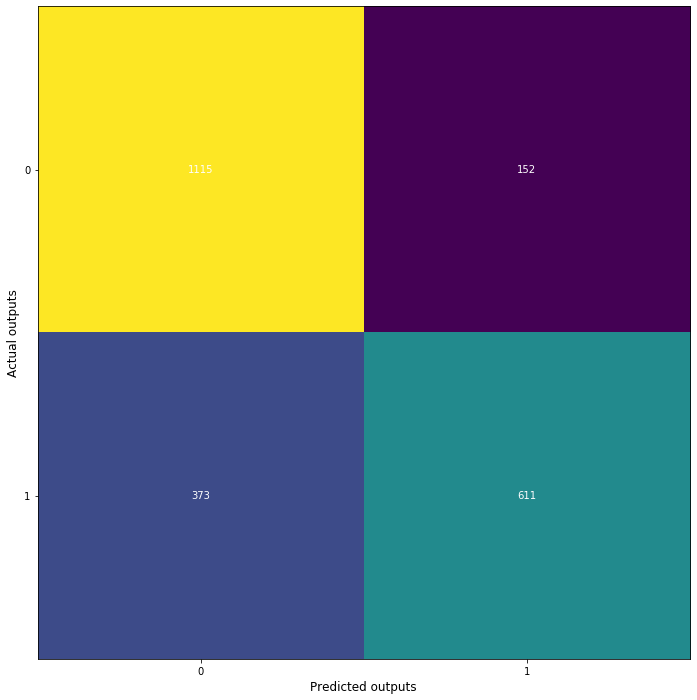

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_split['target'], pred)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()
